# Page View Time Series Visualizer

In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Import dataframe

In [71]:
df = pd.read_csv(r'../data/fcc-forum-pageviews.csv', index_col = 'date', parse_dates = ['date'])
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


### Filter data

In [72]:
df = df[(df['value'] > df['value'].quantile(0.025)) &
            (df['value'] < df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


### Plotting daily forum page views

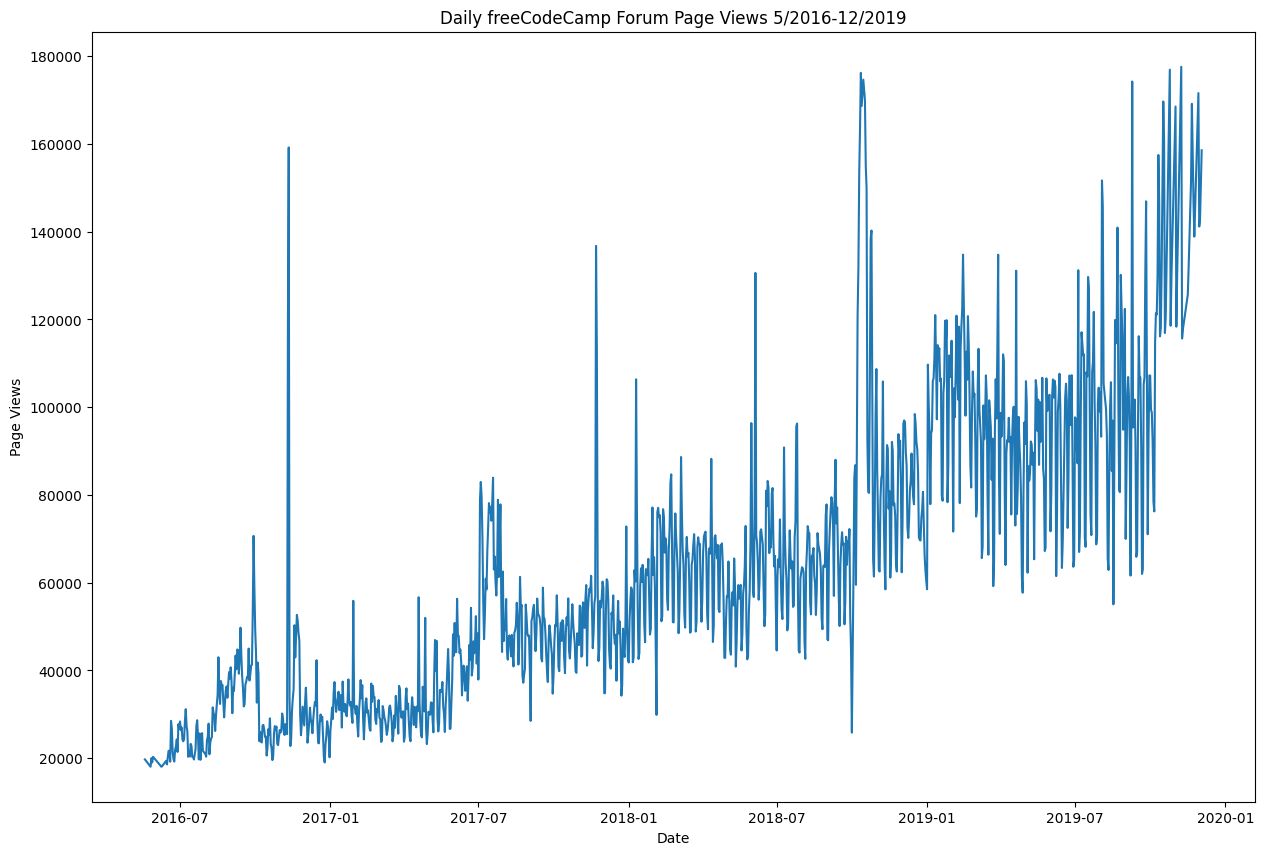

In [73]:
f1, ax = plt.subplots(figsize = (15, 10))
ax.plot(df.index, df.value)

ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

_ = ax.plot()

### Plotting average daily page views for each month grouped by year

In [74]:
df_bar = df.copy()

df_bar['year'] = pd.DatetimeIndex(df.index).year
df_bar['month'] = pd.DatetimeIndex(df.index).month

df_bar = df_bar.groupby(['month', 'year']).value.mean()

In [75]:
import calendar
months = calendar.month_name[1:]

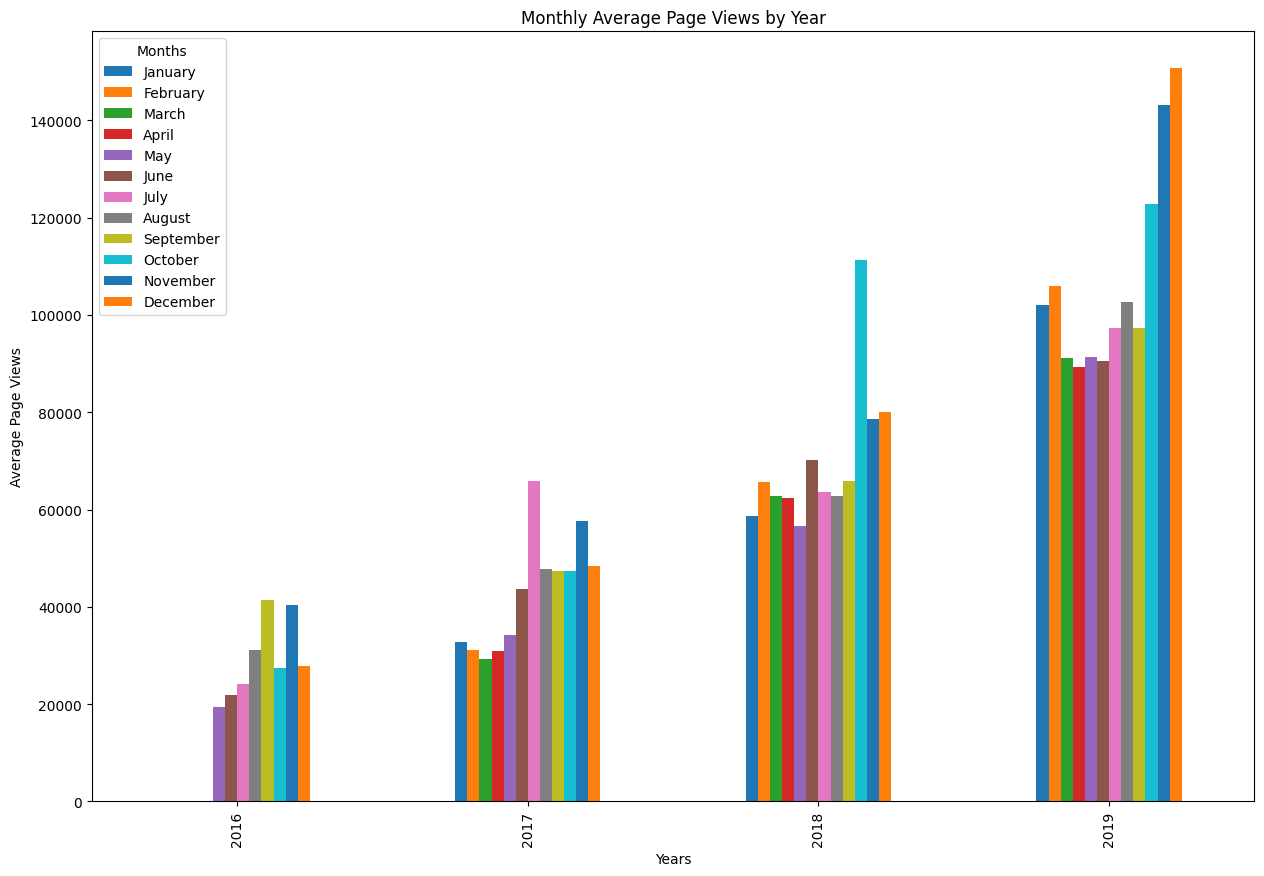

In [76]:
ax2 = df_bar.unstack(0).plot.bar(figsize = (15, 10))

ax2.legend(months, title = 'Months')
ax2.set_xlabel('Years')
ax2.set_ylabel('Average Page Views')
ax2.set_title('Monthly Average Page Views by Year')

f2 = ax2.figure

_ = ax2.plot()

### Year and Month-wise box plots

In [77]:
df_box = df.copy()
df_box.reset_index(inplace = True)

df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Sort by months
df_box['msort'] = df_box.date.dt.month
df_box = df_box.sort_values('msort')

df_box.drop(columns = ['msort'], inplace = True)

Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

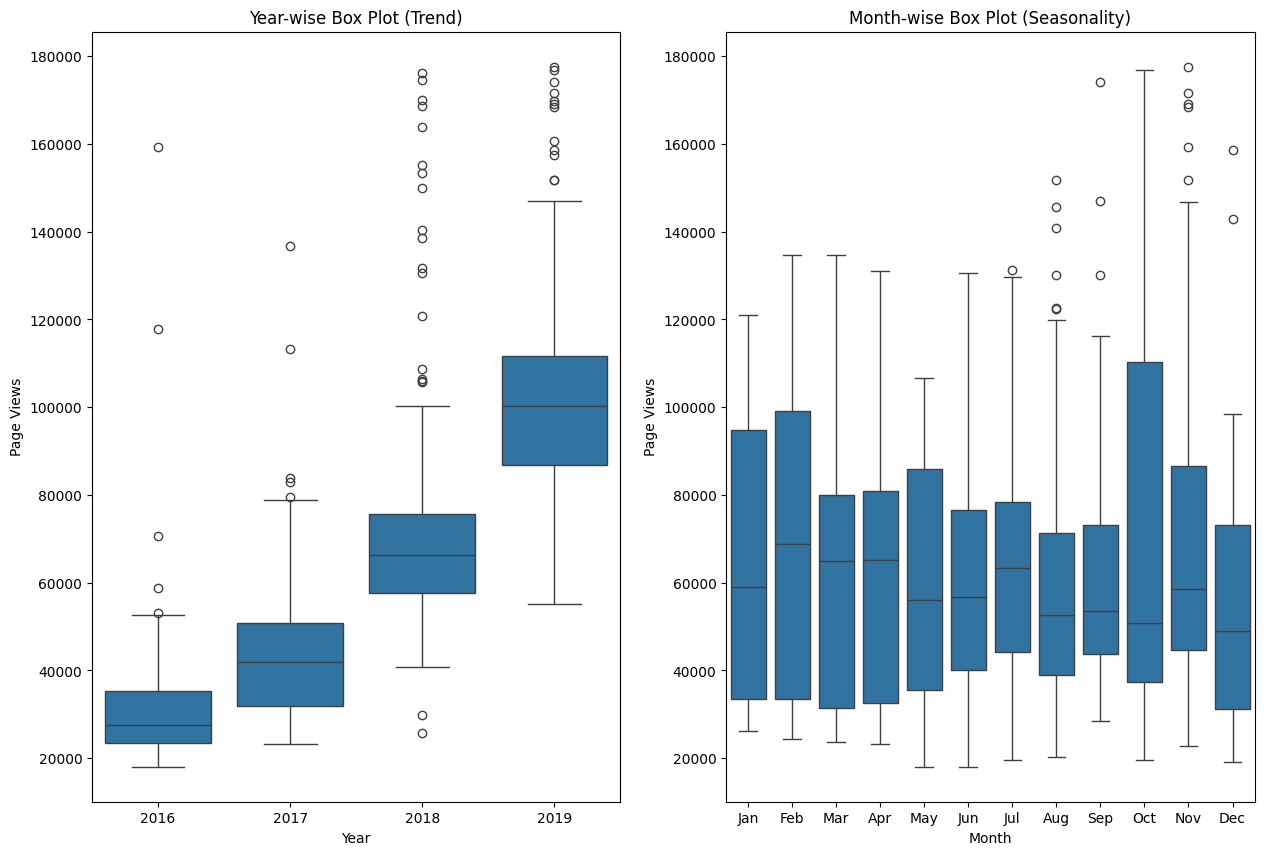

In [78]:
f3, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 10))

ax1 = sns.boxplot(data = df_box, ax = ax1, x = 'year', y = 'value')
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')

ax2 = sns.boxplot(ax = ax2, x = 'month', y = 'value', data = df_box)
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')
ax2.set_title('Month-wise Box Plot (Seasonality)')

### Save plots

In [79]:
f1.savefig(r'lineplot.png')
f2.savefig(r'barplot.png')
f3.savefig(r'boxplot.png')